In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Preparation

In [3]:
df = pd.read_csv('data/match_data.csv')
df = df[df['position'] == 'team']
df = df.dropna()
df

,side,position,gamelength,result,teamkills,teamdeaths,pentakills,firstblood,dragons,elders,heralds,barons,towers,firstmidtower,turretplates,inhibitors,wardsplaced,wardskilled,totalgold,datacompleteness
10,Blue,team,2612,1,13,7,0.0,0.0,4.0,0.0,2.0,1.0,11.0,1.0,4.0,2.0,130,40,72807,complete
11,Red,team,2612,0,7,13,0.0,1.0,3.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,80,49,62745,complete
22,Blue,team,2436,0,20,16,0.0,0.0,3.0,1.0,2.0,2.0,5.0,1.0,6.0,0.0,119,55,80627,complete
23,Red,team,2436,1,16,20,0.0,1.0,4.0,0.0,0.0,1.0,11.0,0.0,2.0,3.0,119,53,77449,complete
34,Blue,team,1980,1,20,7,0.0,0.0,4.0,0.0,0.0,0.0,7.0,1.0,3.0,1.0,106,50,60938,complete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130247,Red,team,1905,1,13,16,0.0,0.0,3.0,0.0,2.0,0.0,9.0,0.0,4.0,1.0,81,36,57820,complete
130258,Blue,team,1863,0,13,23,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,70,47,50922,complete
130259,Red,team,1863,1,23,13,0.0,1.0,4.0,0.0,1.0,1.0,8.0,1.0,5.0,1.0,103,29,60040,complete
130270,Blue,team,2144,1,15,9,0.0,0.0,4.0,0.0,0.0,2.0,10.0,0.0,3.0,2.0,100,46,65430,complete


In [4]:
df.isnull().sum()

side                0
position            0
gamelength          0
result              0
teamkills           0
teamdeaths          0
pentakills          0
firstblood          0
dragons             0
elders              0
heralds             0
barons              0
towers              0
firstmidtower       0
turretplates        0
inhibitors          0
wardsplaced         0
wardskilled         0
totalgold           0
datacompleteness    0
dtype: int64

In [5]:
df_blue = df[df['side'] == 'Blue'].reset_index()
df_red = df[df['side'] == 'Red'].reset_index()

In [6]:
df_blue

,index,side,position,gamelength,result,teamkills,teamdeaths,pentakills,firstblood,dragons,...,heralds,barons,towers,firstmidtower,turretplates,inhibitors,wardsplaced,wardskilled,totalgold,datacompleteness
0,10,Blue,team,2612,1,13,7,0.0,0.0,4.0,...,2.0,1.0,11.0,1.0,4.0,2.0,130,40,72807,complete
1,22,Blue,team,2436,0,20,16,0.0,0.0,3.0,...,2.0,2.0,5.0,1.0,6.0,0.0,119,55,80627,complete
2,34,Blue,team,1980,1,20,7,0.0,0.0,4.0,...,0.0,0.0,7.0,1.0,3.0,1.0,106,50,60938,complete
3,46,Blue,team,1887,0,6,14,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,2.0,0.0,72,32,46853,complete
4,58,Blue,team,2100,1,18,19,0.0,1.0,2.0,...,0.0,1.0,10.0,1.0,4.0,2.0,112,41,67874,complete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9226,130222,Blue,team,1473,0,9,17,0.0,0.0,2.0,...,2.0,0.0,1.0,0.0,6.0,0.0,75,44,39865,complete
9227,130234,Blue,team,1546,1,19,8,0.0,1.0,4.0,...,2.0,1.0,10.0,1.0,11.0,1.0,108,58,54037,complete
9228,130246,Blue,team,1905,0,16,13,0.0,1.0,2.0,...,0.0,2.0,6.0,1.0,2.0,0.0,94,39,59188,complete
9229,130258,Blue,team,1863,0,13,23,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,70,47,50922,complete


In [7]:
df_red

,index,side,position,gamelength,result,teamkills,teamdeaths,pentakills,firstblood,dragons,...,heralds,barons,towers,firstmidtower,turretplates,inhibitors,wardsplaced,wardskilled,totalgold,datacompleteness
0,11,Red,team,2612,0,7,13,0.0,1.0,3.0,...,0.0,0.0,2.0,0.0,2.0,0.0,80,49,62745,complete
1,23,Red,team,2436,1,16,20,0.0,1.0,4.0,...,0.0,1.0,11.0,0.0,2.0,3.0,119,53,77449,complete
2,35,Red,team,1980,0,7,20,0.0,1.0,1.0,...,2.0,1.0,4.0,0.0,6.0,0.0,103,44,53593,complete
3,47,Red,team,1887,1,14,7,0.0,1.0,4.0,...,1.0,1.0,9.0,1.0,1.0,1.0,75,33,57759,complete
4,59,Red,team,2100,0,19,18,0.0,0.0,3.0,...,2.0,0.0,2.0,0.0,4.0,0.0,93,52,60844,complete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9226,130223,Red,team,1473,1,17,9,0.0,1.0,1.0,...,0.0,1.0,7.0,1.0,9.0,1.0,95,32,48971,complete
9227,130235,Red,team,1546,0,7,20,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,4.0,0.0,111,46,41946,complete
9228,130247,Red,team,1905,1,13,16,0.0,0.0,3.0,...,2.0,0.0,9.0,0.0,4.0,1.0,81,36,57820,complete
9229,130259,Red,team,1863,1,23,13,0.0,1.0,4.0,...,1.0,1.0,8.0,1.0,5.0,1.0,103,29,60040,complete


In [8]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9231 entries, 0 to 9230
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             9231 non-null   int64  
 1   side              9231 non-null   object 
 2   position          9231 non-null   object 
 3   gamelength        9231 non-null   int64  
 4   result            9231 non-null   int64  
 5   teamkills         9231 non-null   int64  
 6   teamdeaths        9231 non-null   int64  
 7   pentakills        9231 non-null   float64
 8   firstblood        9231 non-null   float64
 9   dragons           9231 non-null   float64
 10  elders            9231 non-null   float64
 11  heralds           9231 non-null   float64
 12  barons            9231 non-null   float64
 13  towers            9231 non-null   float64
 14  firstmidtower     9231 non-null   float64
 15  turretplates      9231 non-null   float64
 16  inhibitors        9231 non-null   float64


In [9]:
df_match = pd.DataFrame()

# for diff variables:
# blue          red
# <--------------->
#  -             +
df_match['gamelength'] = df_red['gamelength'] 
df_match['result'] = df_red['result'] # 0 - blue win, 1 - red win
df_match['killdiff'] = df_blue['teamkills'] * -1 + df_red['teamkills']
df_match['firstblood'] = df_red['firstblood'] # 0 - blue, 1 - red
df_match['dragondiff'] = df_blue['dragons'] * -1 + df_red['dragons']
df_match['elderdiff'] = df_blue['elders'] * -1 + df_red['elders'] 
df_match['barondiff'] = df_blue['barons'] * -1 + df_red['barons'] 
df_match['towerdiff'] = df_blue['towers'] * -1 + df_red['towers'] 
df_match['firstmid'] = df_red['firstmidtower'] # 0 - blue, 1 - red
df_match['platediff'] = df_blue['turretplates'] * -1 + df_red['turretplates'] 
df_match['inhibdiff'] = df_blue['inhibitors'] * -1 + df_red['inhibitors'] 
df_match['warddiff'] = df_blue['wardsplaced'] * -1 + df_red['wardsplaced'] 
df_match['golddiff'] = df_blue['totalgold'] * -1 + df_red['totalgold']  

df_match

,gamelength,result,killdiff,firstblood,dragondiff,elderdiff,barondiff,towerdiff,firstmid,platediff,inhibdiff,warddiff,golddiff
0,2612,0,-6,1.0,-1.0,0.0,-1.0,-9.0,0.0,-2.0,-2.0,-50,-10062
1,2436,1,-4,1.0,1.0,-1.0,-1.0,6.0,0.0,-4.0,3.0,0,-3178
2,1980,0,-13,1.0,-3.0,0.0,1.0,-3.0,0.0,3.0,-1.0,-3,-7345
3,1887,1,8,1.0,4.0,0.0,1.0,8.0,1.0,-1.0,1.0,3,10906
4,2100,0,1,0.0,1.0,0.0,-1.0,-8.0,0.0,0.0,-2.0,-19,-7030
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9226,1473,1,8,1.0,-1.0,0.0,1.0,6.0,1.0,3.0,1.0,20,9106
9227,1546,0,-12,0.0,-4.0,0.0,-1.0,-9.0,0.0,-7.0,-1.0,3,-12091
9228,1905,1,-3,0.0,1.0,0.0,-2.0,3.0,0.0,2.0,1.0,-13,-1368
9229,1863,1,10,1.0,3.0,0.0,1.0,8.0,1.0,5.0,1.0,33,9118


In [10]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_match.drop('result', axis=1)),columns = df_match.drop('result', axis=1).columns, index = df_match.index)
df_scaled

,gamelength,killdiff,firstblood,dragondiff,elderdiff,barondiff,towerdiff,firstmid,platediff,inhibdiff,warddiff,golddiff
0,2.160359,-0.449102,1.048288,-0.438613,-0.001524,-0.689749,-1.191828,-0.890575,-0.353227,-0.935906,-2.650573,-0.847229
1,1.639134,-0.276063,1.048288,0.338067,-3.519197,-0.689749,0.952041,-0.890575,-0.833687,1.608820,0.004833,-0.209575
2,0.288687,-1.054738,1.048288,-1.215293,-0.001524,0.784281,-0.334280,-0.890575,0.847923,-0.426960,-0.154492,-0.595558
3,0.013267,0.762169,1.048288,1.503087,-0.001524,0.784281,1.237890,1.122870,-0.112997,0.590930,0.164157,1.095004
4,0.644068,0.156533,-0.953936,0.338067,-0.001524,-0.689749,-1.048903,-0.890575,0.127233,-0.935906,-1.004221,-0.566380
...,...,...,...,...,...,...,...,...,...,...,...,...
9226,-1.212796,0.762169,1.048288,-0.438613,-0.001524,0.784281,0.952041,1.122870,0.847923,0.590930,1.066995,0.928273
9227,-0.996606,-0.968219,-0.953936,-1.603633,-0.001524,-0.689749,-1.191828,-0.890575,-1.554378,-0.426960,0.164157,-1.035172
9228,0.066574,-0.189544,-0.953936,0.338067,-0.001524,-1.426763,0.523267,-0.890575,0.607693,0.590930,-0.685573,-0.041917
9229,-0.057809,0.935208,1.048288,1.114747,-0.001524,0.784281,1.237890,1.122870,1.328383,0.590930,1.757400,0.929384


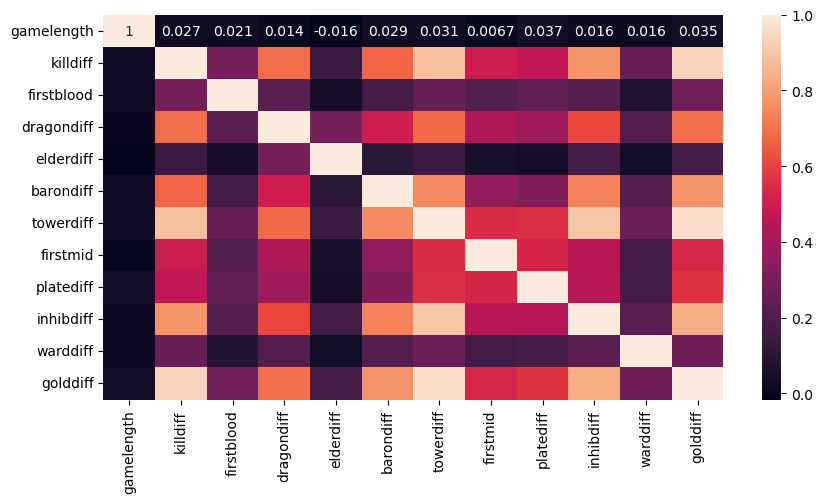

In [66]:
plt.figure(figsize = (10,5))
ax = sns.heatmap(df_scaled.corr(), annot=True)

In [11]:
X = df_scaled
y = df_match['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
X

,gamelength,killdiff,firstblood,dragondiff,elderdiff,barondiff,towerdiff,firstmid,platediff,inhibdiff,warddiff,golddiff
0,2.160359,-0.449102,1.048288,-0.438613,-0.001524,-0.689749,-1.191828,-0.890575,-0.353227,-0.935906,-2.650573,-0.847229
1,1.639134,-0.276063,1.048288,0.338067,-3.519197,-0.689749,0.952041,-0.890575,-0.833687,1.608820,0.004833,-0.209575
2,0.288687,-1.054738,1.048288,-1.215293,-0.001524,0.784281,-0.334280,-0.890575,0.847923,-0.426960,-0.154492,-0.595558
3,0.013267,0.762169,1.048288,1.503087,-0.001524,0.784281,1.237890,1.122870,-0.112997,0.590930,0.164157,1.095004
4,0.644068,0.156533,-0.953936,0.338067,-0.001524,-0.689749,-1.048903,-0.890575,0.127233,-0.935906,-1.004221,-0.566380
...,...,...,...,...,...,...,...,...,...,...,...,...
9226,-1.212796,0.762169,1.048288,-0.438613,-0.001524,0.784281,0.952041,1.122870,0.847923,0.590930,1.066995,0.928273
9227,-0.996606,-0.968219,-0.953936,-1.603633,-0.001524,-0.689749,-1.191828,-0.890575,-1.554378,-0.426960,0.164157,-1.035172
9228,0.066574,-0.189544,-0.953936,0.338067,-0.001524,-1.426763,0.523267,-0.890575,0.607693,0.590930,-0.685573,-0.041917
9229,-0.057809,0.935208,1.048288,1.114747,-0.001524,0.784281,1.237890,1.122870,1.328383,0.590930,1.757400,0.929384


In [13]:
y

0       0
1       1
2       0
3       1
4       0
       ..
9226    1
9227    0
9228    1
9229    1
9230    0
Name: result, Length: 9231, dtype: int64

In [14]:
acc_scores = []
f1_scores = []
pres_scores = []
recall_scores = []

## Logistic Regression

In [16]:
logr = LogisticRegression(max_iter=1000)
logr_param_grid = {
    'C': [0.1, 1, 10, 100]
}
logr_grid = GridSearchCV(estimator=logr, param_grid=logr_param_grid, scoring='accuracy')
logr_grid.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 1, 10, 100]}, scoring='accuracy')

In [17]:
logr_grid.best_params_

{'C': 100}

In [18]:
logr_grid.cv_results_

{'mean_fit_time': array([0.00807071, 0.00732465, 0.00792518, 0.00811391]),
 'std_fit_time': array([0.00265993, 0.00025948, 0.00037831, 0.00037882]),
 'mean_score_time': array([0.00090156, 0.00110188, 0.00070109, 0.00070133]),
 'std_score_time': array([0.00019925, 0.00020103, 0.00040012, 0.00060136]),
 'param_C': masked_array(data=[0.1, 1, 10, 100],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.1}, {'C': 1}, {'C': 10}, {'C': 100}],
 'split0_test_score': array([0.9845321 , 0.98994586, 0.99149265, 0.99149265]),
 'split1_test_score': array([0.9876161 , 0.99226006, 0.98993808, 0.98993808]),
 'split2_test_score': array([0.98839009, 0.98993808, 0.99071207, 0.99071207]),
 'split3_test_score': array([0.99148607, 0.99148607, 0.99303406, 0.99303406]),
 'split4_test_score': array([0.98916409, 0.99226006, 0.99303406, 0.99380805]),
 'mean_test_score': array([0.98823769, 0.99117803, 0.99164218, 0.99179698]),
 'std_test_score':

In [19]:
logr = LogisticRegression(max_iter=1000, C=logr_grid.best_params_['C'])
logr.fit(X_train, y_train)
acc_scores.append(logr.score(X_test, y_test))
logr_pred = logr.predict(X_test)
f1_scores.append(f1_score(y_test, logr_pred))
pres_scores.append(precision_score(y_test, logr_pred))
recall_scores.append(recall_score(y_test, logr_pred))

print(logr.score(X_test, y_test))

0.988086642599278


Text(0.5, 1.0, 'Confusion Matrix - LogisticRegression')

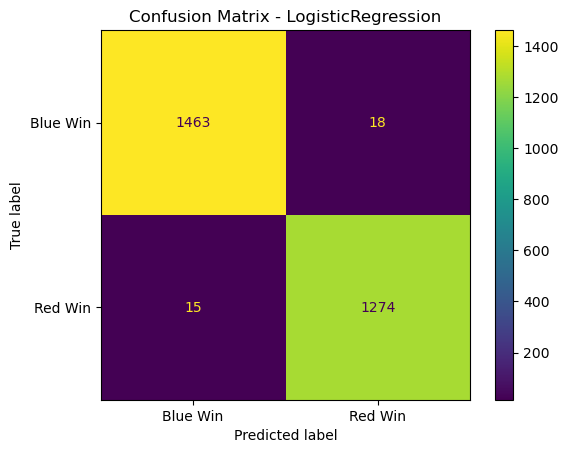

In [20]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, logr_pred), display_labels=['Blue Win', 'Red Win'])
disp.plot()
plt.title('Confusion Matrix - LogisticRegression')

In [21]:
logr.coef_

array([[ 0.07436781, -0.06545169, -0.32334246,  0.78855017, -0.17129352,
        -1.73253127,  5.9367612 , -0.25904055, -0.98674362,  0.188484  ,
        -0.14737916,  8.53569868]])

Text(0.5, 1.0, 'Logistic Regression Coefficients')

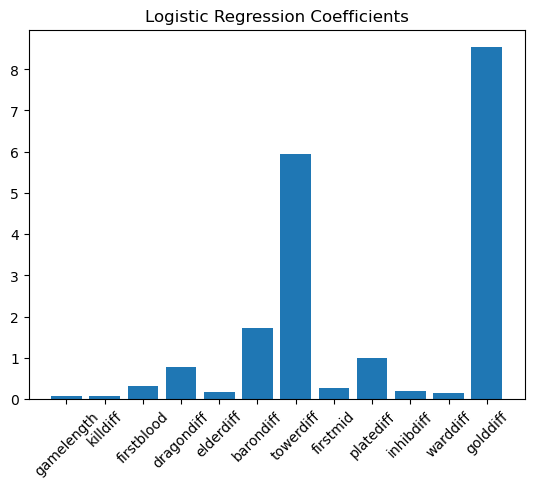

In [22]:
plt.bar(df_match.drop('result', axis=1).columns, np.abs(logr.coef_[0]))
plt.xticks(rotation=45)
plt.title('Logistic Regression Coefficients')

## DecisionTreeClassifier

In [24]:
dt = DecisionTreeClassifier()
dt_param_grid = {'max_depth' : [5, 6, 7, 8, 9, 10],
                 'criterion' :['gini', 'entropy']
                }

dt_grid = GridSearchCV(estimator=dt, param_grid=dt_param_grid, scoring='accuracy')
dt_grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [25]:
dt_grid.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [26]:
dt = DecisionTreeClassifier(criterion=dt_grid.best_params_['criterion'], max_depth=dt_grid.best_params_['max_depth'])
dt.fit(X_train, y_train)
acc_scores.append(dt.score(X_test, y_test))
dt_pred = dt.predict(X_test)
f1_scores.append(f1_score(y_test, dt_pred))
pres_scores.append(precision_score(y_test, dt_pred))
recall_scores.append(recall_score(y_test, dt_pred))

print(dt.score(X_test, y_test))

0.9848375451263538


[Text(0.5, 0.875, 'x[11] <= 0.065\ngini = 0.498\nsamples = 6461\nvalue = [3447, 3014]'),
 Text(0.25, 0.625, 'x[6] <= 0.309\ngini = 0.034\nsamples = 3455\nvalue = [3395, 60]'),
 Text(0.125, 0.375, 'x[11] <= -0.192\ngini = 0.019\nsamples = 3417\nvalue = [3384, 33]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'x[3] <= -0.244\ngini = 0.411\nsamples = 38\nvalue = [11, 27]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'x[6] <= 0.023\ngini = 0.034\nsamples = 3006\nvalue = [52, 2954]'),
 Text(0.625, 0.375, 'x[11] <= 0.307\ngini = 0.497\nsamples = 78\nvalue = [36, 42]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'x[6] <= 0.309\ngini = 0.011\nsamples = 2928\nvalue = [16, 2912]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

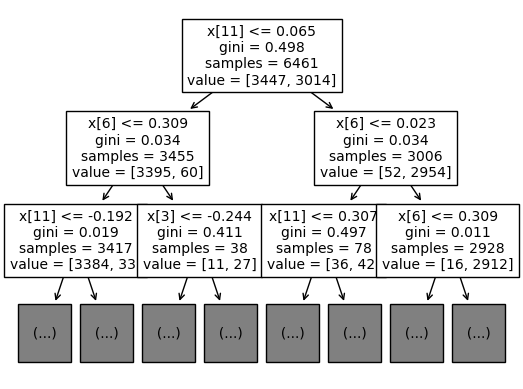

In [27]:
plot_tree(dt, fontsize=10, max_depth=2)

Text(0.5, 1.0, 'Confusion Matrix - DecisionTreeClassifier')

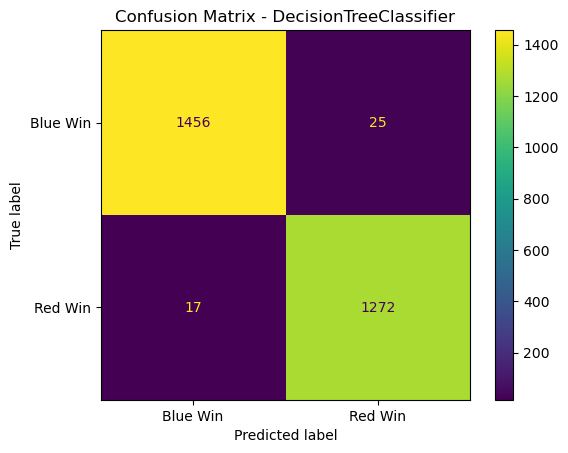

In [28]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, dt_pred), display_labels=['Blue Win', 'Red Win'])
disp.plot()
plt.title('Confusion Matrix - DecisionTreeClassifier')

In [29]:
#dt_grid.cv_results_

## SupportVectorClassifier

In [31]:
svc = SVC(kernel='rbf')
svc_param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                    'C': [0.1, 1, 10, 100, 1000],
                  'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

svc_grid = GridSearchCV(estimator=svc, param_grid=svc_param_grid, scoring='accuracy')
svc_grid.fit(X_train, y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [32]:
svc_grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

In [33]:
#svc_grid.cv_results_ 

In [34]:
svc = SVC(kernel=svc_grid.best_params_['kernel'], C=svc_grid.best_params_['C'], gamma=svc_grid.best_params_['gamma'])
svc.fit(X_train, y_train)
acc_scores.append(svc.score(X_test, y_test))
svc_pred = svc.predict(X_test)
f1_scores.append(f1_score(y_test, svc_pred))
pres_scores.append(precision_score(y_test, svc_pred))
recall_scores.append(recall_score(y_test, svc_pred))

print(svc.score(X_test, y_test))

0.9877256317689531


Text(0.5, 1.0, 'Confusion Matrix - SupportVectorClassifier')

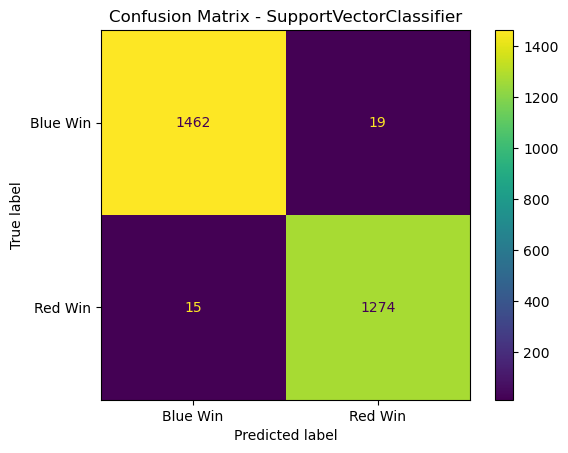

In [35]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, svc_pred), display_labels=['Blue Win', 'Red Win'])
disp.plot()
plt.title('Confusion Matrix - SupportVectorClassifier')

## KNeighborsClassifier

In [37]:
knn = KNeighborsClassifier()
k_range = list(range(1, 15))
knn_param_grid = dict(n_neighbors=k_range)

knn_grid = GridSearchCV(estimator=knn, param_grid=knn_param_grid, scoring='accuracy')
knn_grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14]},
             scoring='accuracy')

In [38]:
knn_grid.best_params_

{'n_neighbors': 11}

In [39]:
#knn_grid.cv_results_

In [40]:
knn = KNeighborsClassifier(n_neighbors=knn_grid.best_params_['n_neighbors'])
knn.fit(X_train, y_train)
acc_scores.append(knn.score(X_test, y_test))
knn_pred = knn.predict(X_test)
f1_scores.append(f1_score(y_test, knn_pred))
pres_scores.append(precision_score(y_test, knn_pred))
recall_scores.append(recall_score(y_test, knn_pred))

print(knn.score(X_test, y_test))

0.9819494584837545


Text(0.5, 1.0, 'Confusion Matrix - KNeighborsClassifier')

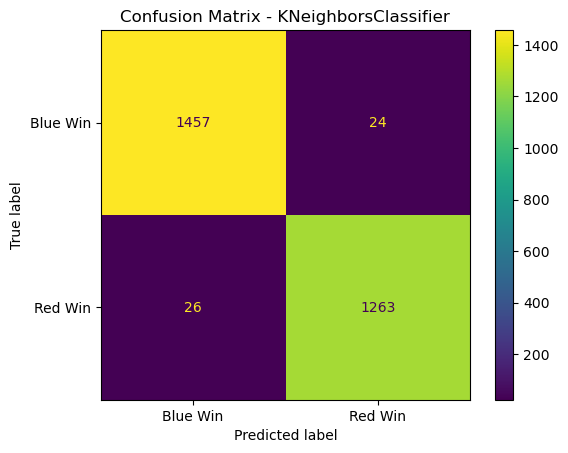

In [41]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, knn_pred), display_labels=['Blue Win', 'Red Win'])
disp.plot()
plt.title('Confusion Matrix - KNeighborsClassifier')

## RandomForestClassifier

In [44]:
rf = RandomForestClassifier()
rf_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': [10, 20, 30 , 40]
}

rf_grid = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv = 3, scoring='accuracy')
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_features': [10, 20, 30, 40],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy')

In [45]:
rf_grid.best_params_

{'max_features': 20, 'n_estimators': 100}

In [46]:
rf = RandomForestClassifier(n_estimators=rf_grid.best_params_['n_estimators'], max_features=rf_grid.best_params_['max_features'])
rf.fit(X_train, y_train)
acc_scores.append(rf.score(X_test, y_test))
rf_pred = rf.predict(X_test)
f1_scores.append(f1_score(y_test, rf_pred))
pres_scores.append(precision_score(y_test, rf_pred))
recall_scores.append(recall_score(y_test, rf_pred))

print(rf.score(X_test, y_test))

0.9862815884476535


Text(0.5, 1.0, 'Confusion Matrix - RandomForestClassifier')

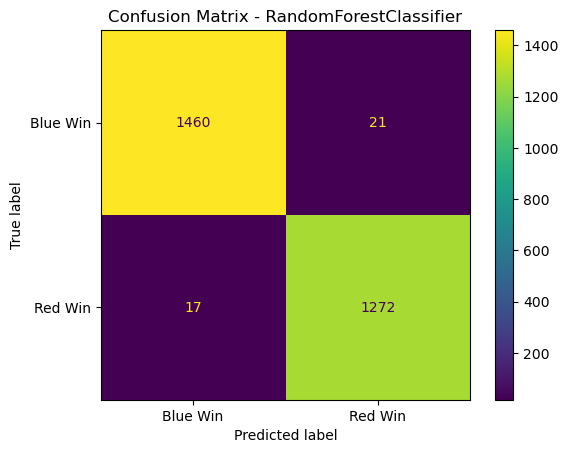

In [47]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, rf_pred), display_labels=['Blue Win', 'Red Win'])
disp.plot()
plt.title('Confusion Matrix - RandomForestClassifier')

## Scores

In [49]:
acc_scores

[0.988086642599278,
 0.9848375451263538,
 0.9877256317689531,
 0.9819494584837545,
 0.9862815884476535]

In [50]:
f1_scores

[0.9872142580395196,
 0.9837587006960556,
 0.9868319132455461,
 0.9805900621118013,
 0.9852827265685515]

Text(0.5, 1.0, 'Accuracy vs. F1-Score')

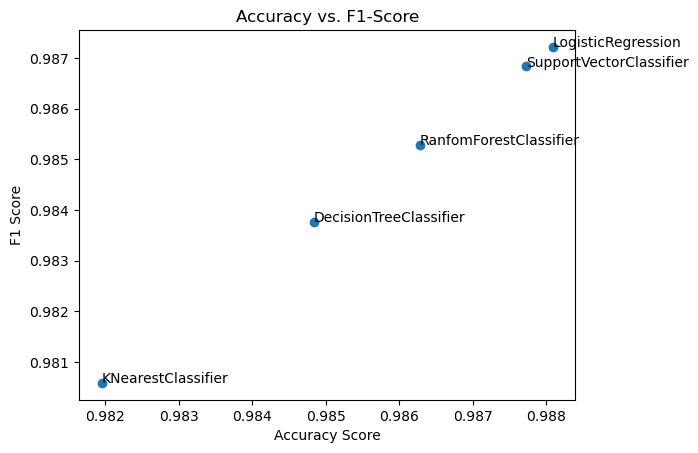

In [51]:
labels = ['LogisticRegression', 'DecisionTreeClassifier', 'SupportVectorClassifier', 'KNearestClassifier', 'RanfomForestClassifier']

fig, ax = plt.subplots()
ax.scatter(acc_scores, f1_scores)

for i, txt in enumerate(labels):
    ax.annotate(txt, (acc_scores[i], f1_scores[i]))

plt.xlabel('Accuracy Score')
plt.ylabel('F1 Score')
plt.title('Accuracy vs. F1-Score')

In [52]:
results_df = pd.DataFrame( {
    'model': labels,
    'accuracy': acc_scores,
    'precision': pres_scores,
    'recall': recall_scores,
    'f1_score': f1_scores
}).set_index('model')

results_df

,accuracy,precision,recall,f1_score
model,,,,
LogisticRegression,0.988087,0.986068,0.988363,0.987214
DecisionTreeClassifier,0.984838,0.980725,0.986811,0.983759
SupportVectorClassifier,0.987726,0.985305,0.988363,0.986832
KNearestClassifier,0.981949,0.981352,0.979829,0.980590
RanfomForestClassifier,0.986282,0.983759,0.986811,0.985283
